<a href="https://colab.research.google.com/github/sugiyama404/ReinfoceLearningForTrading/blob/main/make_data_analysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
import copy

import seaborn as sns

drive.mount('/content/drive/')
exp_dir = 'Colab Notebooks/workspace/export/'

random_path = '/content/drive/My Drive/' + exp_dir + 'random_test.csv'
qlearning_path = '/content/drive/My Drive/' + exp_dir + 'qlearning_test.csv'
sarsa_path = '/content/drive/My Drive/' + exp_dir + 'sarsa_test.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
df_r = pd.read_csv(random_path)
df_q = pd.read_csv(qlearning_path)
df_s = pd.read_csv(sarsa_path)
df_r_1 = df_r.drop("Unnamed: 0", axis=1)
df_q_1 = df_q.drop("Unnamed: 0", axis=1)
df_s_1 = df_s.drop("Unnamed: 0", axis=1)
df_r_1['WinRate'] = df_r_1['TradeWin'] / df_r_1['TradeTimes'] * 100
df_q_1['WinRate'] = df_q_1['TradeWin'] / df_q_1['TradeTimes'] * 100
df_s_1['WinRate'] = df_s_1['TradeWin'] / df_s_1['TradeTimes'] * 100

df_r_1['WinRate'] = df_r_1['WinRate'].fillna(0)
df_q_1['WinRate'] = df_q_1['WinRate'].fillna(0)
df_s_1['WinRate'] = df_s_1['WinRate'].fillna(0)

df_r_1['WinRate'] = df_r_1['WinRate'].round(2)
df_q_1['WinRate'] = df_q_1['WinRate'].round(2)
df_s_1['WinRate'] = df_s_1['WinRate'].round(2)



df_r_1['FixedProfitRate'] = df_r_1['FixedProfit'] /1000000 * 100
df_q_1['FixedProfitRate'] = df_q_1['FixedProfit'] /1000000 * 100
df_s_1['FixedProfitRate'] = df_s_1['FixedProfit'] /1000000 * 100

df_r_1['FixedProfitRate'] = df_r_1['FixedProfitRate'].fillna(0)
df_q_1['FixedProfitRate'] = df_q_1['FixedProfitRate'].fillna(0)
df_s_1['FixedProfitRate'] = df_s_1['FixedProfitRate'].fillna(0)

df_r_1['FixedProfitRate'] = df_r_1['FixedProfitRate'].round(2)
df_q_1['FixedProfitRate'] = df_q_1['FixedProfitRate'].round(2)
df_s_1['FixedProfitRate'] = df_s_1['FixedProfitRate'].round(2)

'''
df_r_1['FixedProfit'] = df_r_1['FixedProfit'].round(2)
df_q_1['FixedProfit'] = df_q_1['FixedProfit'].round(2)
df_s_1['FixedProfit'] = df_s_1['FixedProfit'].round(2)
'''
del df_r_1['FixedProfit']
del df_r_1['TradeTimes']
del df_r_1['TradeWin']
del df_q_1['FixedProfit']
del df_q_1['TradeTimes']
del df_q_1['TradeWin']
del df_s_1['FixedProfit']
del df_s_1['TradeTimes']
del df_s_1['TradeWin']
df_s_1

,WinRate,FixedProfitRate
0,0.00,130.01
1,100.00,104.03
2,0.00,97.89
3,100.00,107.79
4,100.00,104.08
...,...,...
95,100.00,144.86
96,66.67,118.61
97,100.00,137.43
98,0.00,116.45


In [3]:
df_a = pd.DataFrame(columns=['random', 'qlearning', 'sarsa'])
df_a['random'] = df_r_1['FixedProfitRate']
df_a['qlearning'] = df_q_1['FixedProfitRate']
df_a['sarsa'] = df_s_1['FixedProfitRate']

df_b = pd.DataFrame(columns=['random', 'qlearning', 'sarsa'])
df_b['random'] = df_r_1['WinRate']
df_b['qlearning'] = df_q_1['WinRate']
df_b['sarsa'] = df_s_1['WinRate']

dfTa_melt = pd.melt(df_a)
dfTa_melt['species'] = 'FixedProfitRate'

dfAt_melt = pd.melt(df_b)
dfAt_melt['species'] = 'WinRate'

df = pd.concat([dfAt_melt, dfTa_melt], axis=0)
df

,variable,value,species
0,random,58.45,WinRate
1,random,59.21,WinRate
2,random,61.64,WinRate
3,random,65.07,WinRate
4,random,54.97,WinRate
...,...,...,...
295,sarsa,144.86,FixedProfitRate
296,sarsa,118.61,FixedProfitRate
297,sarsa,137.43,FixedProfitRate
298,sarsa,116.45,FixedProfitRate


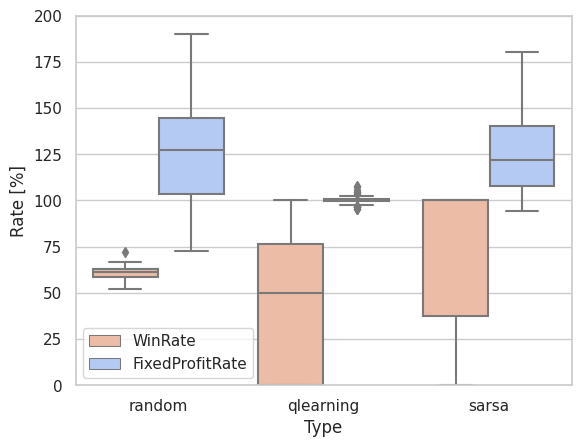

In [10]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set3')


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='variable', y='value', data=df, hue='species', palette='coolwarm_r', ax=ax)


ax.set_xlabel('Type')
ax.set_ylabel('Rate [%]')
ax.set_ylim(0, 200)
ax.legend()

plt.show()